In [269]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Convolution2D, Flatten, Dense

In [256]:
data = np.load('final_data.npy')

imgs = data[0]
steering = data[1]

X_train, X_test, y_train, y_test = train_test_split(imgs, steering, test_size = 0.2)

In [257]:
def batch_generator(imgs, steering, batch_size):   
   
    while True:
        
        X = []
        y = []
    
        for i in range(batch_size):
        
            index = np.random.randint(0,len(imgs)-1)
            img = cv.imread(imgs[index])
            
                
            img = cv.cvtColor(img, cv.COLOR_BGR2YUV)
            img = img[60:135,:,:]
            
            img = cv.resize(img , (200,66))
            
            

            if (np.random.rand() > 0.5):

                brighness_cont = np.random.randint(1,4)
                img = img / brighness_cont

            if (np.random.rand() > 0.5):

                img = cv.flip(img, 1)
                steering_angle = -float(steering[index])

            else:
                steering_angle = float(steering[index])
            
            
            X.append(img)
            y.append(steering_angle)
            
        X = np.array(X)
        y = np.array(y)

        yield X,y

In [291]:
model = Sequential()

model.add(Convolution2D(24, (5,5), strides = (2,2), input_shape = (66,200,3), activation = 'elu'))
model.add(Convolution2D(36, (5,5), strides = (2,2), activation = 'elu'))
model.add(Convolution2D(48, (5,5), strides = (2,2), activation = 'elu'))

model.add(Convolution2D(64, (3,3), activation = 'elu'))
model.add(Convolution2D(64, (3,3), activation = 'elu'))

model.add(Flatten())

model.add(Dense(100, activation = 'elu'))
model.add(Dense(50, activation = 'elu'))
model.add(Dense(10, activation = 'elu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [292]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)              

In [293]:
history = model.fit(batch_generator(X_train, y_train, 64), steps_per_epoch = 300, epochs = 8,
         validation_data = batch_generator(X_test,y_test, 64), validation_steps = 200)

Epoch 1/8
300/300 [==============================] - 217s 723ms/step - loss: 2.2769 - acc: 0.2138 - val_loss: 0.0720 - val_acc: 0.2248
Epoch 2/8
300/300 [==============================] - 211s 703ms/step - loss: 0.0627 - acc: 0.2291 - val_loss: 0.0792 - val_acc: 0.2319
Epoch 3/8
300/300 [==============================] - 221s 737ms/step - loss: 0.0561 - acc: 0.2228 - val_loss: 0.0469 - val_acc: 0.2277
Epoch 4/8
300/300 [==============================] - 235s 783ms/step - loss: 0.0506 - acc: 0.2262 - val_loss: 0.0485 - val_acc: 0.2299
Epoch 5/8
300/300 [==============================] - 210s 699ms/step - loss: 0.0452 - acc: 0.2308 - val_loss: 0.0456 - val_acc: 0.2288
Epoch 6/8
300/300 [==============================] - 271s 903ms/step - loss: 0.0453 - acc: 0.2299 - val_loss: 0.0421 - val_acc: 0.2256
Epoch 7/8
300/300 [==============================] - 225s 750ms/step - loss: 0.0418 - acc: 0.2264 - val_loss: 0.0463 - val_acc: 0.2324
Epoch 8/8
300/300 [==============================] - 24

In [276]:
history.history['loss']

{'loss': [0.030937531447658935, 0.029367038495838643],
 'val_loss': [0.043898248514160514, 0.0487028316501528]}

In [277]:
history.history['loss']

[0.030937531447658935, 0.029367038495838643]

In [278]:
history.history['val_loss']

[0.043898248514160514, 0.0487028316501528]

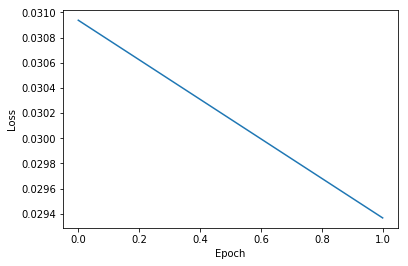

In [282]:
plt.plot(history.history['loss'])

plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.show()

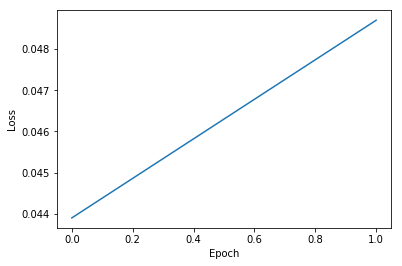

In [283]:
plt.plot(history.history['val_loss'])

plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.show()

In [294]:
model.save('Model.h5')

In [286]:
model = load_model('12_Epoch_Model.h5')